# Electricity consumption outliers

We observe some outlier energy values.  This notebook creates visualizations of the hours used per week data to identify anomalies.

In [1]:
%matplotlib inline
import seaborn as sns

from drs_sentani import get_survey
import pandas as pd
survey = get_survey()
import pysentani as sti
survey['access_type'] = sti.access_type(survey)

# we may want to do this more fine-grained so we know what we are omitting
survey = survey.fillna(0)

We iterate over a list of appliances and find the hours and energy associated with each appliance.

In [2]:
powers = {'TV':0.075, 'fridge':0.200, 'radio':0.100, 'fan':0.135, 'rice_cooker':0.700, 'lighting':0.400}
appliance_list = ['TV', 'fridge', 'radio', 'fan', 'rice_cooker', 'lighting']

for appliance in appliance_list:
    # create column label from appliance names
    wk_col = 'app_{}_per_wk'.format(appliance)
    hr_col = 'app_{}_hrs'.format(appliance)
    energy_col = 'daily_{}_energy'.format(appliance)
    weekly_hr_col = 'weekly_{}_hrs'.format(appliance)
    survey[weekly_hr_col] = survey[wk_col] * survey[hr_col]    
    survey[energy_col] = survey[weekly_hr_col] / 7 * powers[appliance]
    

We convert the data into tidy format in order to facilitate visualization.  The column names for the weekly hour observations are converted into values in a single column and the values associated are in a separate column.

There are only 168 hour in a week so several outliers emerge by filtering by number of hours.

In [15]:
wk_columns = [f for f in survey.columns if 'weekly' in f]
id_columns = ['village_name', 'demand_point', 'access_type']

columns = wk_columns + id_columns
plt_data = pd.melt(survey[columns], value_vars=wk_columns, id_vars=id_columns)

# show everything over 168 hours
plt_data[plt_data['value']>168]

,village_name,demand_point,access_type,variable,value
859,Khamayakha,household,PLN_grid,weekly_TV_hrs,576
1301,Hobong,household,PLN_grid,weekly_fridge_hrs,120000
1932,Sosiri,household,PLN_grid,weekly_fridge_hrs,576
1933,Sosiri,household,PLN_grid,weekly_fridge_hrs,576
2035,Evale,household,PLN_grid,weekly_fridge_hrs,576
2043,Khamayakha,household,PLN_grid,weekly_fridge_hrs,576
3224,Khamayakha,household,PLN_grid,weekly_radio_hrs,576
5590,Evale,household,PLN_grid,weekly_rice_cooker_hrs,576
5599,Khamayakha,household,PLN_grid,weekly_rice_cooker_hrs,576
5932,Abar,household,no_access,weekly_lighting_hrs,1400000


This strip plot lets us see the per-household data.

/Users/dsoto/anaconda/envs/sotolab/lib/python3.4/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


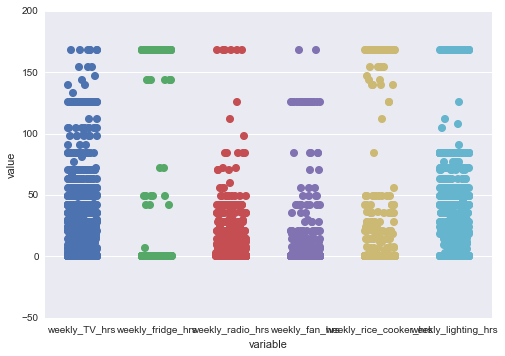

In [17]:
sns.stripplot(data=plt_data[plt_data['value']<=168], x='variable', y='value', jitter=0.2)